dim= 160
dim_k= 300
eigenvalue_k [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


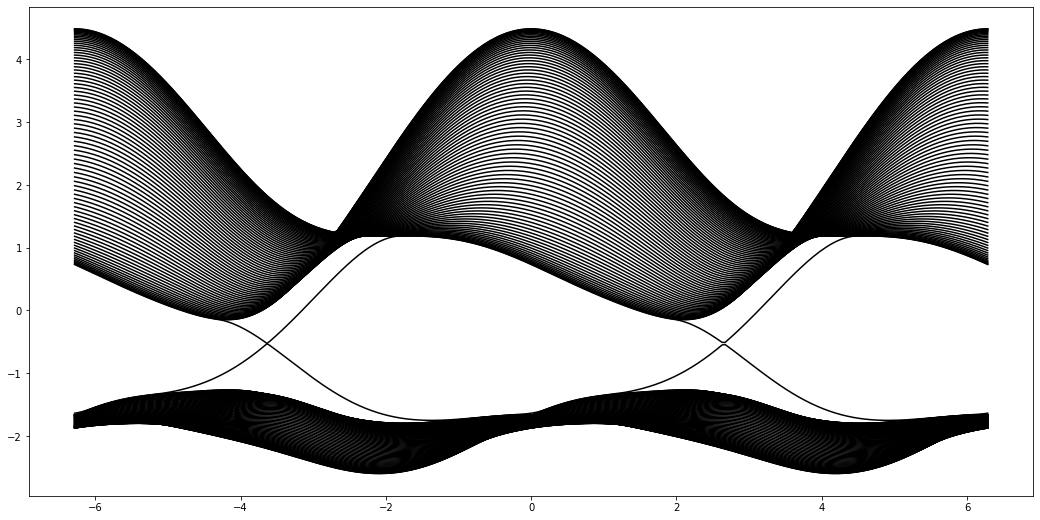

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from math import *   # 引入sqrt(), pi, exp等
import cmath  # 要处理复数情况，用到cmath.exp()
import functools  # 使用偏函数functools.partial()


def hamiltonian(k, N, M, a, t1, t2, phi):  # Haldane哈密顿量(N是条带的宽度参数）
    # 初始化为零矩阵
    h00 = np.zeros((4*N, 4*N))*(1+0j)   # 乘(1+0j)是为了把h0转为复数
    h01 = np.zeros((4*N, 4*N))*(1+0j)

    # 原胞内的跃迁h00
    for i in range(N):
        h00[i*4+0, i*4+0] = M
        h00[i*4+1, i*4+1] = -M
        h00[i*4+2, i*4+2] = M
        h00[i*4+3, i*4+3] = -M

        # 最近邻
        h00[i*4+0, i*4+1] = t1
        h00[i*4+1, i*4+0] = t1
        h00[i*4+1, i*4+2] = t1
        h00[i*4+2, i*4+1] = t1
        h00[i*4+2, i*4+3] = t1
        h00[i*4+3, i*4+2] = t1

        # 次近邻
        h00[i*4+0, i*4+2] = t2*cmath.exp(-1j*phi)  # 逆时针为正，顺时针为负
        h00[i*4+2, i*4+0] = h00[i*4+0, i*4+2].conj()
        h00[i*4+1, i*4+3] = t2*cmath.exp(-1j*phi)
        h00[i*4+3, i*4+1] = h00[i*4+1, i*4+3].conj()
    for i in range(N-1):
        # 最近邻
        h00[i*4+3, (i+1)*4+0] = t1
        h00[(i+1)*4+0, i*4+3] = t1

        # 次近邻
        h00[i*4+2, (i+1)*4+0] = t2*cmath.exp(1j*phi)
        h00[(i+1)*4+0, i*4+2] = h00[i*4+2, (i+1)*4+0].conj()
        h00[i*4+3, (i+1)*4+1] = t2*cmath.exp(1j*phi)
        h00[(i+1)*4+1, i*4+3] = h00[i*4+3, (i+1)*4+1].conj()

    # 原胞间的跃迁h01
    for i in range(N):
        # 最近邻
        h01[i*4+1, i*4+0] = t1
        h01[i*4+2, i*4+3] = t1

        # 次近邻
        h01[i*4+0, i*4+0] = t2*cmath.exp(1j*phi)
        h01[i*4+1, i*4+1] = t2*cmath.exp(-1j*phi)
        h01[i*4+2, i*4+2] = t2*cmath.exp(1j*phi)
        h01[i*4+3, i*4+3] = t2*cmath.exp(-1j*phi)

        h01[i*4+1, i*4+3] = t2*cmath.exp(1j*phi)
        h01[i*4+2, i*4+0] = t2*cmath.exp(-1j*phi)
        if i != 0:
            h01[i*4+1, (i-1)*4+3] = t2*cmath.exp(1j*phi)
    for i in range(N-1):
        h01[i*4+2, (i+1)*4+0] = t2*cmath.exp(-1j*phi)

    matrix = h00 + h01*cmath.exp(1j*a*k) + h01.transpose().conj()*cmath.exp(-1j*a*k) #
    return matrix


def main():
    hamiltonian0 = functools.partial(hamiltonian, N=40, M=2/3, a=1, t1=1, t2=1/3, phi=pi/4)  # 使用偏函数，固定一些参数
    k = np.linspace(-2*pi, 2*pi, 300)
    plot_bands_one_dimension(k, hamiltonian0)


def plot_bands_one_dimension(k, hamiltonian, filename='bands_1D'):
    dim = hamiltonian(0).shape[0]   #对hamiltonian（0）矩阵进行列或行的计数   dim=4*N
    print('dim=',dim)
    dim_k = k.shape[0]              #k值的多少
    print('dim_k=',dim_k)
    eigenvalue_k = np.zeros((dim_k, dim))  # np.zeros()里要用数组
    print('eigenvalue_k',eigenvalue_k)
    i0 = 0
    fig = plt.figure(figsize=(18, 9))
    for k0 in k:
        matrix0 = hamiltonian(k0)
        eigenvalue, eigenvector = np.linalg.eig(matrix0)      #求本征值
        eigenvalue_k[i0, :] = np.sort(np.real(eigenvalue[:])) #sort为行向排序
        i0 += 1 #i0=i0+1
    for dim0 in range(dim):
        plt.plot(k, eigenvalue_k[:, dim0], '-k')  #画图
    # plt.savefig(filename + '.jpg')
    # plt.savefig(filename+'.eps')
    
    plt.show()   #显示图


if __name__ == '__main__':  # 如果是当前文件直接运行，执行main()函数中的内容；如果是import当前文件，则不执行。
    main()

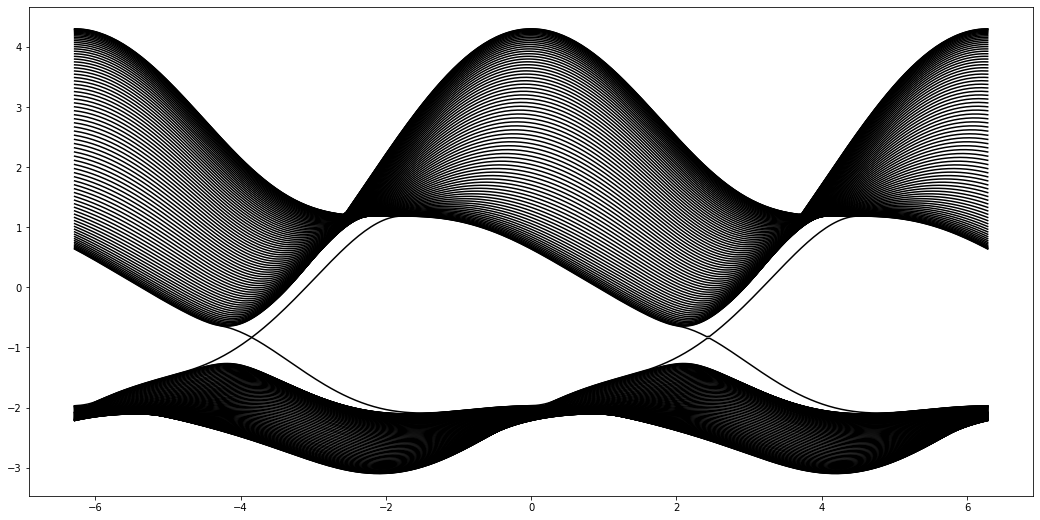

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from math import *   # 引入sqrt(), pi, exp等
import cmath  # 要处理复数情况，用到cmath.exp()
import functools  # 使用偏函数functools.partial()


def hamiltonian(k, N, M, r1, a, t1, t2, phi):  # Haldane哈密顿量(N是条带的宽度参数）
    # 初始化为零矩阵
    h00 = np.zeros((4*N, 4*N))*(1+0j)   # 乘(1+0j)是为了把h0转为复数
    h01 = np.zeros((4*N, 4*N))*(1+0j)

    # 原胞内的跃迁h00
    for i in range(N):
        h00[i*4+0, i*4+0] = M
        h00[i*4+1, i*4+1] = -M - r1
        h00[i*4+2, i*4+2] = M
        h00[i*4+3, i*4+3] = -M - r1

        # 最近邻
        h00[i*4+0, i*4+1] = t1
        h00[i*4+1, i*4+0] = t1
        h00[i*4+1, i*4+2] = t1
        h00[i*4+2, i*4+1] = t1
        h00[i*4+2, i*4+3] = t1
        h00[i*4+3, i*4+2] = t1

        # 次近邻
        h00[i*4+0, i*4+2] = t2*cmath.exp(-1j*phi)  # 逆时针为正，顺时针为负
        h00[i*4+2, i*4+0] = h00[i*4+0, i*4+2].conj()
        h00[i*4+1, i*4+3] = t2*cmath.exp(-1j*phi)
        h00[i*4+3, i*4+1] = h00[i*4+1, i*4+3].conj()
    for i in range(N-1):
        # 最近邻
        h00[i*4+3, (i+1)*4+0] = t1
        h00[(i+1)*4+0, i*4+3] = t1

        # 次近邻
        h00[i*4+2, (i+1)*4+0] = t2*cmath.exp(1j*phi)
        h00[(i+1)*4+0, i*4+2] = h00[i*4+2, (i+1)*4+0].conj()
        h00[i*4+3, (i+1)*4+1] = t2*cmath.exp(1j*phi)
        h00[(i+1)*4+1, i*4+3] = h00[i*4+3, (i+1)*4+1].conj()

    # 原胞间的跃迁h01
    for i in range(N):
        # 最近邻
        h01[i*4+1, i*4+0] = t1
        h01[i*4+2, i*4+3] = t1

        # 次近邻
        h01[i*4+0, i*4+0] = t2*cmath.exp(1j*phi)
        h01[i*4+1, i*4+1] = t2*cmath.exp(-1j*phi)
        h01[i*4+2, i*4+2] = t2*cmath.exp(1j*phi)
        h01[i*4+3, i*4+3] = t2*cmath.exp(-1j*phi)

        h01[i*4+1, i*4+3] = t2*cmath.exp(1j*phi)
        h01[i*4+2, i*4+0] = t2*cmath.exp(-1j*phi)
        if i != 0:
            h01[i*4+1, (i-1)*4+3] = t2*cmath.exp(1j*phi)
    for i in range(N-1):
        h01[i*4+2, (i+1)*4+0] = t2*cmath.exp(-1j*phi)

    matrix = h00 + h01*cmath.exp(1j*a*k) + h01.transpose().conj()*cmath.exp(-1j*a*k) #
    return matrix


def main():
    hamiltonian0 = functools.partial(hamiltonian, N=40, M=2/3, r1=1/2, a=1, t1=1, t2=1/3, phi=pi/4)  # 使用偏函数，固定一些参数
    k = np.linspace(-2*pi, 2*pi, 300)
    plot_bands_one_dimension(k, hamiltonian0)


def plot_bands_one_dimension(k, hamiltonian, filename='bands_1D'):
    dim = hamiltonian(0).shape[0]   #对hamiltonian（0）矩阵进行列或行的计数   dim=4*N

    dim_k = k.shape[0]              #k值的多少

    eigenvalue_k = np.zeros((dim_k, dim))  # np.zeros()里要用数组

    i0 = 0
    fig = plt.figure(figsize=(18, 9))
    for k0 in k:
        matrix0 = hamiltonian(k0)
        eigenvalue, eigenvector = np.linalg.eig(matrix0)      #求本征值
        eigenvalue_k[i0, :] = np.sort(np.real(eigenvalue[:])) #sort为行向排序
        i0 += 1 #i0=i0+1
    for dim0 in range(dim):
        plt.plot(k, eigenvalue_k[:, dim0], '-k')  #画图
    # plt.savefig(filename + '.jpg')
    # plt.savefig(filename+'.eps')
    
    plt.show()   #显示图


if __name__ == '__main__':  # 如果是当前文件直接运行，执行main()函数中的内容；如果是import当前文件，则不执行。
    main()

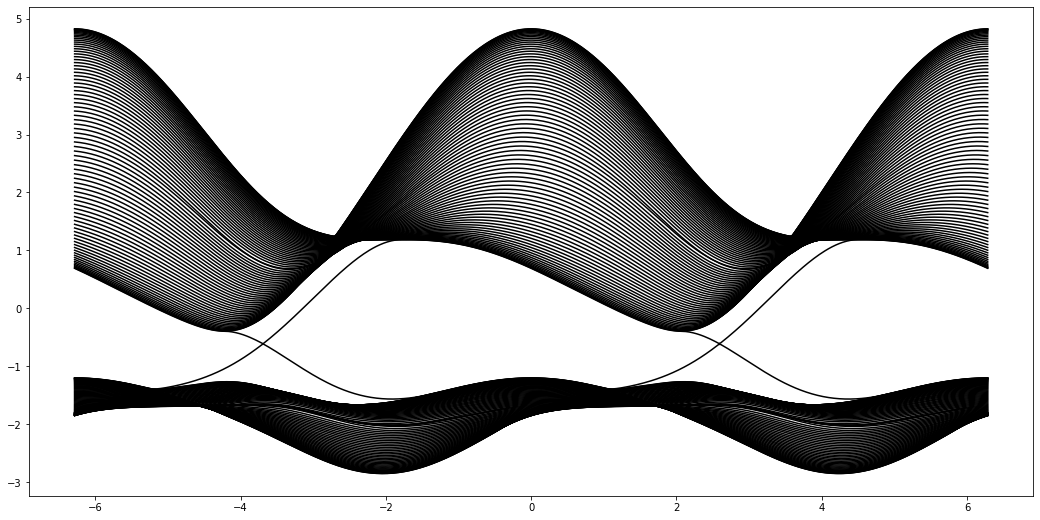

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from math import *   # 引入sqrt(), pi, exp等
import cmath  # 要处理复数情况，用到cmath.exp()
import functools  # 使用偏函数functools.partial()


def hamiltonian(k, N, M, r1, a, t1, t2, phi):  # Haldane哈密顿量(N是条带的宽度参数）
    # 初始化为零矩阵
    h00 = np.zeros((4*N, 4*N))*(1+0j)   # 乘(1+0j)是为了把h0转为复数
    h01 = np.zeros((4*N, 4*N))*(1+0j)

    # 原胞内的跃迁h00
    for i in range(N):
        h00[i*4+0, i*4+0] = M
        h00[i*4+1, i*4+1] = -M + r1
        h00[i*4+2, i*4+2] = M
        h00[i*4+3, i*4+3] = -M + r1

        # 最近邻
        h00[i*4+0, i*4+1] = t1
        h00[i*4+1, i*4+0] = t1
        h00[i*4+1, i*4+2] = t1
        h00[i*4+2, i*4+1] = t1
        h00[i*4+2, i*4+3] = t1
        h00[i*4+3, i*4+2] = t1

        # 次近邻
        h00[i*4+0, i*4+2] = t2*cmath.exp(-1j*phi)  # 逆时针为正，顺时针为负
        h00[i*4+2, i*4+0] = h00[i*4+0, i*4+2].conj()
        h00[i*4+1, i*4+3] = t2*cmath.exp(-1j*phi) + r1
        h00[i*4+3, i*4+1] = h00[i*4+1, i*4+3].conj() + r1
    for i in range(N-1):
        # 最近邻
        h00[i*4+3, (i+1)*4+0] = t1
        h00[(i+1)*4+0, i*4+3] = t1

        # 次近邻
        h00[i*4+2, (i+1)*4+0] = t2*cmath.exp(1j*phi)
        h00[(i+1)*4+0, i*4+2] = h00[i*4+2, (i+1)*4+0].conj()
        h00[i*4+3, (i+1)*4+1] = t2*cmath.exp(1j*phi) + r1
        h00[(i+1)*4+1, i*4+3] = h00[i*4+3, (i+1)*4+1].conj() + r1

    # 原胞间的跃迁h01
    for i in range(N):
        # 最近邻
        h01[i*4+1, i*4+0] = t1
        h01[i*4+2, i*4+3] = t1

        # 次近邻
        h01[i*4+0, i*4+0] = t2*cmath.exp(1j*phi)
        h01[i*4+1, i*4+1] = t2*cmath.exp(-1j*phi) + r1
        h01[i*4+2, i*4+2] = t2*cmath.exp(1j*phi)
        h01[i*4+3, i*4+3] = t2*cmath.exp(-1j*phi) + r1

        h01[i*4+1, i*4+3] = t2*cmath.exp(1j*phi) + r1
        h01[i*4+2, i*4+0] = t2*cmath.exp(-1j*phi)
        if i != 0:
            h01[i*4+1, (i-1)*4+3] = t2*cmath.exp(1j*phi) + r1
    for i in range(N-1):
        h01[i*4+2, (i+1)*4+0] = t2*cmath.exp(-1j*phi)

    matrix = h00 + h01*cmath.exp(1j*a*k) + h01.transpose().conj()*cmath.exp(-1j*a*k) #
    return matrix


def main():
    hamiltonian0 = functools.partial(hamiltonian, N=40, M=2/3, r1=1/10, a=1, t1=1, t2=1/3, phi=pi/4)  # 使用偏函数，固定一些参数
    k = np.linspace(-2*pi, 2*pi,500)
    plot_bands_one_dimension(k, hamiltonian0)


def plot_bands_one_dimension(k, hamiltonian, filename='bands_1D'):
    dim = hamiltonian(0).shape[0]   #对hamiltonian（0）矩阵进行列或行的计数   dim=4*N

    dim_k = k.shape[0]              #k值的多少

    eigenvalue_k = np.zeros((dim_k, dim))  # np.zeros()里要用数组

    i0 = 0
    fig = plt.figure(figsize=(18, 9))
    for k0 in k:
        matrix0 = hamiltonian(k0)
        eigenvalue, eigenvector = np.linalg.eig(matrix0)      #求本征值
        eigenvalue_k[i0, :] = np.sort(np.real(eigenvalue[:])) #sort为行向排序
        i0 += 1 #i0=i0+1
    for dim0 in range(dim):
        plt.plot(k, eigenvalue_k[:, dim0], '-k')  #画图
    # plt.savefig(filename + '.jpg')
    # plt.savefig(filename+'.eps')
    
    plt.show()   #显示图


if __name__ == '__main__':  # 如果是当前文件直接运行，执行main()函数中的内容；如果是import当前文件，则不执行。
    main()